# Ridge_regression

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import linear_model
from numpy.linalg import inv,det,multi_dot,norm
from sklearn.metrics import confusion_matrix

In [27]:
#%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

In [139]:
class Ridge:    
    def __init__(self):
        self.x=None
        self.y=None        
        self.weights = None
        self.bias = None
        self.cost= [ ]        
        
    def kfold(self,x,y):
        kf = KFold(n_splits=5) 
        x=np.array(x)
        y=np.array(y)
        MinErr=[ ]
        alpha_range = [10**i for i in range(-8,2)]
        for j in alpha_range :
            l=[ ]
            for train_index,test_index in kf.split(x,y):
                self.Ridge_linear_Train(x,y,j,1,1000,10**-10)                
                pred= self.Error(x[test_index],y[test_index])
                l.append(pred)
            MinErr.append(sum(l)/len(l))
            print(f"Learning rate: {j} mean error is : {sum(l)/len(l)}")
        
        k= np.argmin(MinErr)        
        optimal_alpha=(alpha_range[k-1])
        print("optimal Learning rate is-->{}".format(optimal_alpha))
        return optimal_alpha
    
    def kfold_logistic(self,x,y):
        kf = KFold(n_splits=5) 
        x=np.array(x)
        y=np.array(y)
        MinErr=[ ]
        alpha_range = [10**i for i in range(-8,2)]
        for j in alpha_range :
            l=[ ]
            for train_index,test_index in kf.split(x,y):
                self.Ridge_logistic_Train(x,y,j,1,500,10**-10)                
                pred= self.Error_logit(x[test_index],y[test_index])
                l.append(pred)
            MinErr.append(sum(l)/len(l))
            print(f"Learning rate: {j} mean error is : {sum(l)/len(l)}")
        
        k= np.argmin(MinErr)        
        optimal_alpha=(alpha_range[k])
        print("optimal Learning rate is-->{}".format(optimal_alpha))
        return optimal_alpha
   
    def Ridge_linear_Train(self,x,y,alpha,lmbda,itr,eps):  
        r,c=x.shape
        x=np.array(x)
        y=np.array(y).reshape(r,1)
        w=np.zeros((c,1))
        w_list=[w]
        bias=[ ]
        cost_list=[ ]
        w0=0
        for i in range(itr):
            fx = np.dot(x,w)+w0            
            Err = fx - y              
            w = w * (1-(alpha*lmbda)) - (alpha/r)* np.dot(x.T,Err)            
            w0 = w0 - alpha*np.sum(Err)            
            cost = (1/(2*r))* np.sum(np.square(y-fx))+(lmbda/2)*np.sum(np.square(w))            
            cost_list.append(cost)            
            w_list.append(w)
            bias.append(w0)
            if cost < eps:
                break 
                
        self.cost=cost_list        
        self.weights=w
        self.bias=bias[-1]  
    
    def Ridge_Linear_Test(self,x,y):
        r,c=x.shape
        x=np.array(x)
        y=np.array(y).reshape(r,1)
        y_cal= np.dot(x, self.weights) + self.bias
        MSE=(1/len(x))* np.sum(np.square(y_cal - y))
        print(" ")
        print('Mean Square Error is-->{}'.format(MSE))
        self.plot_decison_boundary(x,y)
        
    def sigmoid_func(self,z):
        return 1/(1+np.exp(-(z)))
    
    def Ridge_logistic_Train(self,x,y,alpha,lmbda,itr,eps):  
        r,c=x.shape
        x=np.array(x)
        y=np.array(y).reshape(r,1)
        w=np.zeros((c,1))
        w_list=[w]
        bias=[ ]
        cost_list=[ ]
        w0=0
        for i in range(itr):
            fx = np.dot(x,w)+w0
            h0=self.sigmoid_func(fx)
            Err = h0 - y              
            w = w * (1-(alpha*lmbda)) - (alpha/r)* np.dot(x.T,Err)            
            w0 = w0 - alpha*np.sum(Err)            
            cost = - (np.sum(np.log(h0)*y+ np.log(1-h0)*(1-y)))+ np.sum(np.square(w))            
            cost_list.append(cost)            
            w_list.append(w)
            bias.append(w0)
            if cost < eps:
                break 
                
        self.cost=cost_list        
        self.weights=w
        self.bias=bias[-1] 

    def confusion_mat(self,y_test,y_pred):        
        cm = confusion_matrix(y_test,y_pred)
        return cm   

    def Ridge_Logistic_Test(self,x,y):
        r,c=x.shape
        x=np.array(x)
        y=np.array(y).reshape(r,1)
        z= np.dot(x, self.weights) + self.bias
        y_pred = self.sigmoid_func(z)      
        y_cal = np.array([1 if i > 0.5 else 0 for i in y_pred]).reshape(r,1)        
        MSE=(1/len(x))* np.sum(np.square(y_cal - y))            
        print("")
        print('Mean Square Error is-->{}'.format(MSE))
        cm=self.confusion_mat(y,y_cal)
        print(cm)
        self.performance(cm)
    
    def Error_logit(self,x,y):
        r,c=x.shape
        x=np.array(x)
        y=np.array(y).reshape(1,r)
        fx = np.dot(x, self.weights) + self.bias         
        y_pred = self.sigmoid_func(fx)        
        y_cal = np.array([1 if i > 0.4 else 0 for i in y_pred]).reshape(1,r)        
        MSE=(1/len(x))* np.sum(np.square(y_cal - y))       
        return MSE  
        
    def Error(self,x,y):
        r,c=x.shape
        x=np.array(x)
        y=np.array(y).reshape(r,1)
        fx = np.dot(x, self.weights) + self.bias        
        Err=np.sum(np.square(fx - y))
        return Err  
        
    def plot_decison_boundary(self,x,y):
            r,c = x.shape
            # 3D hyperplane plotting
            fig=plt.figure()
            ax=fig.add_subplot(111,projection='3d')            
            temp = np.linspace(-3,5)
            x1,x2 = np.meshgrid(temp,temp)
            z = lambda x1,x2: x1*self.weights[0]+ x2*self.weights[1]+ self.bias
            ax.plot_surface(x1, x2, z(x1, x2)) 
            ax.scatter3D(x[:,[0]], x[:,[1]],y ,label="Actual data")
            ax.set_xlabel('X1',fontsize = 10)
            ax.set_ylabel('X2',fontsize = 10)
            ax.set_zlabel('X3',fontsize = 10)
            plt.legend(loc='best')
            plt.title('Hyperplane Plot')
            plt.show()
        
    def performance(self,cm):
        r,c=cm.shape
        if(r==2):
            tp = cm[0][0]
            tn = cm[1][1]
            fp = cm[0][1]
            fn = cm[1][0]            
            
        elif(r==3):
            tp = cm[0][0]
            tn = cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2]
            fp = cm[0][1]+cm[0][2]
            fn = cm[1][0]+cm[2][0]
                    
        accuracy=(tp+tn)/(tp+tn+fp+fn)
        sn = tp/(tp+fn)
        sp = tn/(tn+fp)
        pr = tp/(tp+fp)
        fm = 2*(pr*sn)/(pr+sn)
        print(" ")
        print("Performance of model")
        print(f"Accuracy is {accuracy}")
        print(f"Sensitivity is {sn}")
        print(f"Specificity is {sp}")
        print(f"Precission is {pr}")
        print(f"F_measur is {fm}")    
        


# Question 1

In [52]:
def lmbda_plot(x1,x2,y1,y2,alpha1):
    alpha_range = [i for i in range(50)]
    training_error = [ ]
    testing_error = [ ]    
    for i in alpha_range:
        model= Ridge()
        model.Ridge_linear_Train(x1,y1,alpha1,i,200,10**-10)       
        training_error.append(model.Error(x1,y1))
        testing_error.append(model.Error(x2,y2))
        
    
    plt.scatter(alpha_range,training_error,marker="+",label="training error")
    plt.scatter(alpha_range,testing_error,marker="*",label="testing error")
    plt.legend()
    plt.title('Plotting of Error wrt lambda Parameter')
    plt.show()
    
def Test_model(data):
    r,c=data.shape
    #data=(data - data.min()) / (data.max() - data.min()) #Normalization
    x = data.iloc[:,range(c-1)]
    y = data.iloc[:,c-1]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
    model=Ridge()
    alpha1=model.kfold(X_train,y_train)
    model.Ridge_linear_Train(X_train,y_train,alpha1,1,200,10**-10)
    print(" ")
    print('Parameters for hyperplane are-->')
    print(model.weights)
    print(" ")
    print("bais ")
    print(model.bias)
    model.Ridge_Linear_Test(X_test,y_test)
    
    print(" ")
    print("Cost History Plot")
    
    k=list(range(200))
    fig=plt.figure(figsize=(10, 8))
    ax=fig.add_subplot(221)    
    ax=plt.plot(k,model.cost)
    plt.title('Cost vs Iteration')
    ax2=fig.add_subplot(222) 
    ax2=lmbda_plot(X_train, X_test, y_train, y_test,alpha1)
    

Learning rate: 1e-08 mean error is : 1176.2695537936556
Learning rate: 1e-07 mean error is : 1162.7505581511944
Learning rate: 1e-06 mean error is : 1042.3727090297423
Learning rate: 1e-05 mean error is : 595.1666414184581
Learning rate: 0.0001 mean error is : 460.6712998042566
Learning rate: 0.001 mean error is : 192.65804257377218
Learning rate: 0.01 mean error is : 149.6883512814539
Learning rate: 0.1 mean error is : nan
Learning rate: 1 mean error is : nan
Learning rate: 10 mean error is : nan
optimal Learning rate is-->0.01
 
Parameters for hyperplane are-->
[[ 1.41743145]
 [-1.85849698]]
 
bais 
5.061020375137021
 
Mean Square Error is-->6.5449904755825274


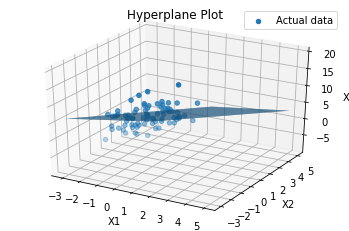

 
Cost History Plot


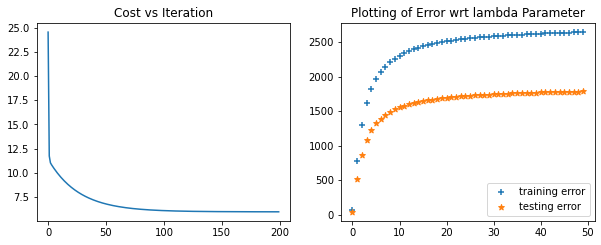

In [53]:
df = pd.read_csv("data1.csv",header = None)
Test_model(df)

# Question 8

In [140]:
def test_model(data):
    r,c=data.shape
    #data=(data - data.min()) / (data.max() - data.min()) #Normalization
    x = data.iloc[:,range(c-1)]
    y = data.iloc[:,c-1]    
    for i in range(len(y)):
        if(y[i]<0):
            y[i]=0
        else:
            y[i]=1    
    y=np.array(y).reshape(r,1)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
    model=Ridge()
    alpha1=model.kfold_logistic(X_train,y_train)
    model.Ridge_logistic_Train(X_train,y_train,alpha1,1,200,10**-10)
    print(" ")
    print('Parameters for hyperplane are-->')
    print(model.weights)
    print(" ")
    print("bais ")
    print(model.bias)
    model.Ridge_Logistic_Test(X_test,y_test)    
    
    
   
    x=data[0]
    y_cal=-(model.bias +x *model.weights[0])/model.weights[1]
    plt.plot(x,y_cal)
    plt.scatter(data[0], data[1], c=data[2],label="Actual data")
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend(loc='best')
    plt.title('Hyperplane Plot')
    plt.show()
    

Learning rate: 1e-08 mean error is : 0.5166666666666666
Learning rate: 1e-07 mean error is : 0.5166666666666666
Learning rate: 1e-06 mean error is : 0.5166666666666666
Learning rate: 1e-05 mean error is : 0.14166666666666666
Learning rate: 0.0001 mean error is : 0.11666666666666665
Learning rate: 0.001 mean error is : 0.10833333333333332
Learning rate: 0.01 mean error is : 0.10833333333333332
Learning rate: 0.1 mean error is : 0.25
Learning rate: 1 mean error is : 0.5166666666666666
Learning rate: 10 mean error is : 0.5166666666666666
optimal Learning rate is-->0.001
 
Parameters for hyperplane are-->
[[ 0.0853681]
 [-0.1542711]]
 
bais 
0.8101257250249638

Mean Square Error is-->0.125
[[35  2]
 [ 8 35]]
 
Performance of model
Accuracy is 0.875
Sensitivity is 0.813953488372093
Specificity is 0.9459459459459459
Precission is 0.9459459459459459
F_measur is 0.875


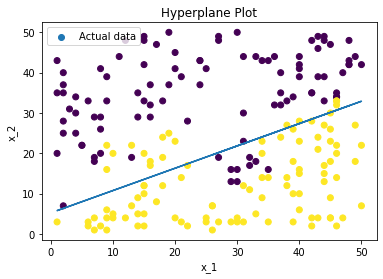

In [141]:
df5 = pd.read_csv("data5.csv",header = None)
test_model(df5)